In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hoseinsajadian","key":"2585a23bbbd8c5dbb130805d23841de7"}'}

In [2]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
!kaggle datasets download -d uciml/adult-census-income

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 80.4MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/adult-census-income.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import Libraries

In [5]:
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Import Files

In [6]:
df=pd.read_csv("adult.csv")

# Basic Steps

In [7]:
df.shape

(32561, 15)

In [8]:
pd.value_counts(df.dtypes)

object    9
int64     6
dtype: int64

In [9]:
# No Null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [11]:
# Null values seems to be replaced with ?
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

# Null Value Check

In [12]:
df[df == '?'] = np.nan

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
fig= make_subplots(rows=1,cols=2,
                  subplot_titles=("Null Value ratio column wise", "HeatMap for Null Values (0 -> Not Null & 1 -> Null)")
                  )



temp_data= df.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

fig.add_trace(px.imshow(
                        df.isna().astype(np.int8)
                       ).data[0],
              row=1,col=2)

fig.update_layout(showlegend=False)
fig.show()

# impute missing values

In [15]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Unique Value Check

In [16]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

In [17]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values per Categorical feature", "Unique values per Numerical feature"))


temp_data=df.select_dtypes(exclude="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#016CC9')),
    row=1, col=1
)



temp_data=df.select_dtypes(include="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#DEB078')),
    row=1, col=2
)

#fig.update_layout(showlegend=False)
fig.show()

In [18]:
df.select_dtypes(exclude="number").nunique().sort_values()

sex                2
income             2
race               5
relationship       6
marital.status     7
workclass          8
occupation        14
education         16
native.country    41
dtype: int64

In [19]:
df.select_dtypes(include="number").nunique().sort_values()

education.num        16
age                  73
capital.loss         92
hours.per.week       94
capital.gain        119
fnlwgt            21648
dtype: int64

# Add some categorical features

In [20]:
df[['education.num.cate']]=df[['education.num']].astype('str')

In [21]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 16 < x < 31 ):
        return "17-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

# Analysis Numerical Columns

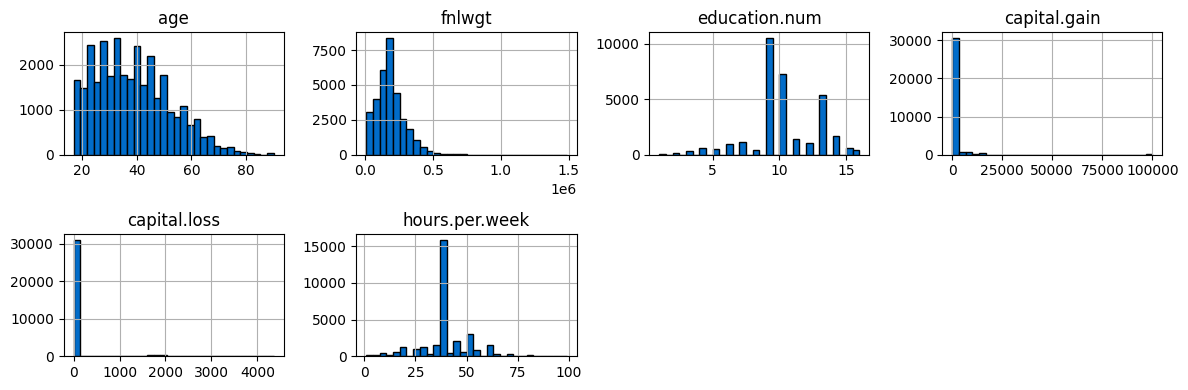

In [22]:
# Plots the histogram for each numerical feature in a separate subplot
figsize_val=(12,4)
layout_val=(-1, 4)
df.hist(bins=30, figsize=figsize_val, layout=layout_val, edgecolor="black",color='#016CC9')
plt.tight_layout()

In [23]:
df.skew()

<ipython-input-23-9e0b1e29546f>:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



age                    0.558743
fnlwgt                 1.446980
education.num         -0.311676
capital.gain          11.953848
capital.loss           4.594629
hours.per.week         0.227643
education.num.cate    -0.311676
dtype: float64

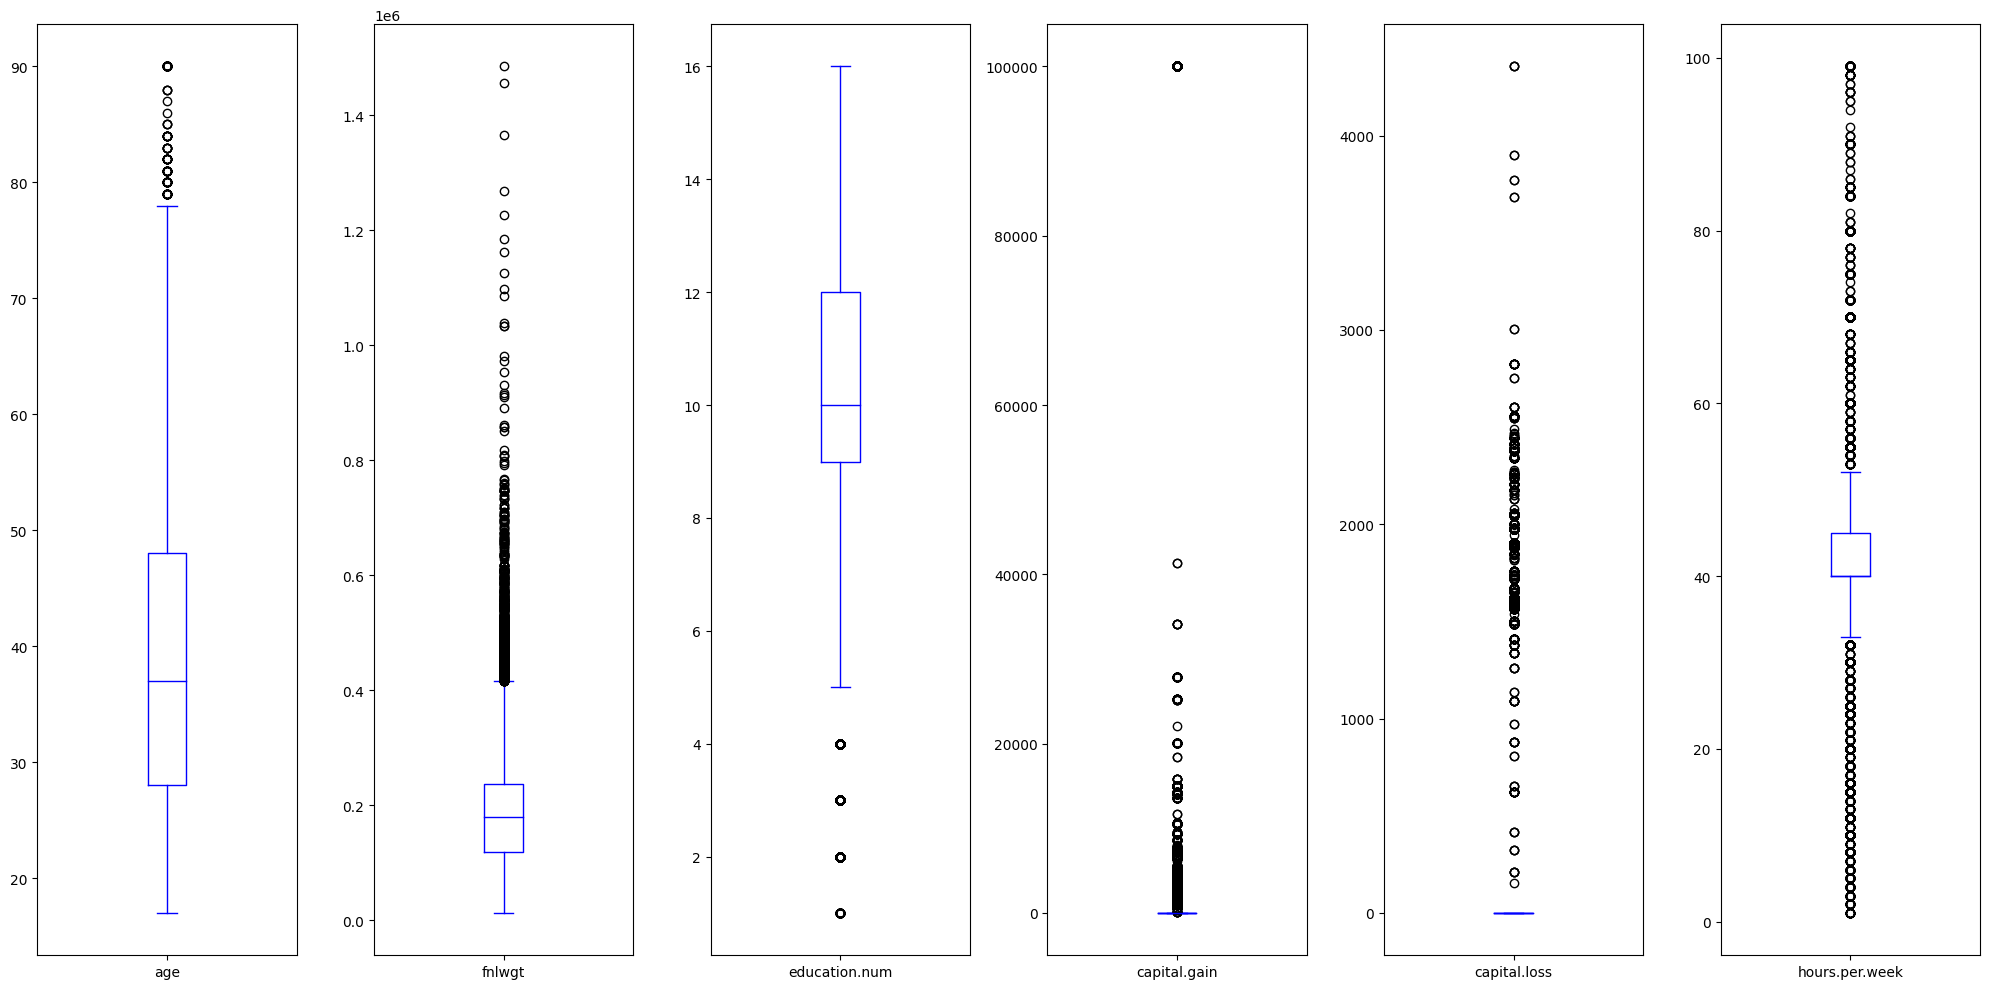

In [24]:
df.plot(subplots=True, figsize=(20,10),color='b',kind = 'box')
plt.tight_layout()

# Analysis Categorical Columns

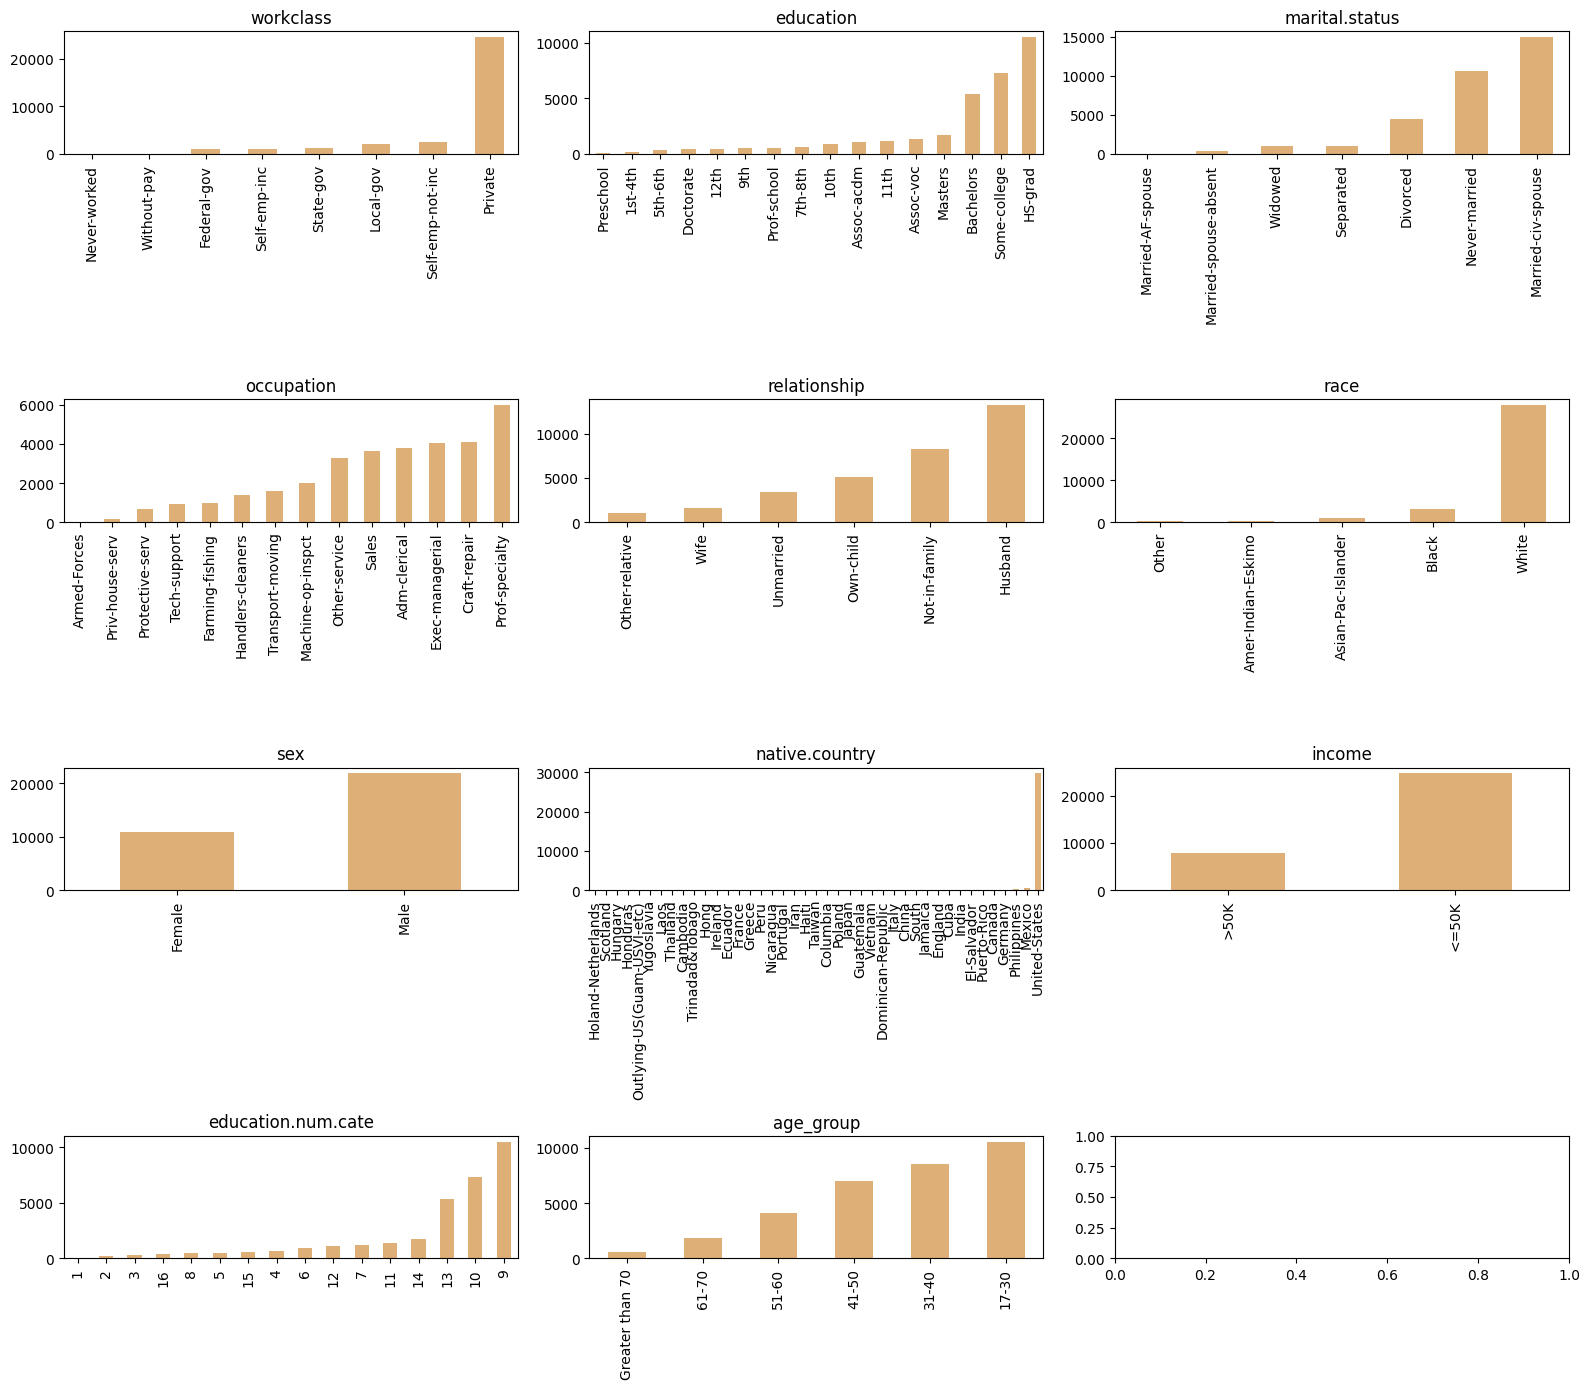

In [25]:
fields=df.select_dtypes(exclude="number").columns

figuresize=(16,14)
cols=3
rows=math.ceil(len(fields)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(fields)+1) :
    plt.subplot(rows,cols,i)
    df[fields[i-1]].value_counts().sort_values().plot.bar(color='#DEB078')
    plt.xticks(rotation=90)
    plt.title(fields[i-1])

plt.tight_layout()
plt.show()

# Analysis Target Variable

In [26]:
df[['income']].value_counts(normalize=True).round(decimals=3)*100

income
<=50K     75.9
>50K      24.1
dtype: float64

In [27]:
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12),
                           height=500, width=1000))


In [28]:
target=df[['income']].value_counts(normalize=True).round(decimals=3)*100

#target.rename(index={1:'Default',0:'Paid'},inplace=True)

pal, color=['#016CC9','#DEB078'], ['#8DBAE2','#EDD3B3']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5,
                     showlegend=True,sort=False,
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Income: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution',
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',width=700)
fig.show()

# Target variable Relation with Categorical variables

In [29]:
df.select_dtypes(exclude='number').columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income',
       'education.num.cate', 'age_group'],
      dtype='object')

In [30]:
px.histogram(df, x='age_group', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [31]:
px.histogram(df, x='workclass', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [32]:
px.histogram(df, x='education', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [33]:
px.histogram(df, x='education.num.cate', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [34]:
px.histogram(df, x='marital.status', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [35]:
px.histogram(df, x='occupation', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [36]:
px.histogram(df, x='relationship', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [37]:
px.histogram(df, x='race', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [38]:
px.histogram(df, x='sex', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [39]:
px.histogram(df, x='native.country', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

# Target variable Relation with Numerical variables

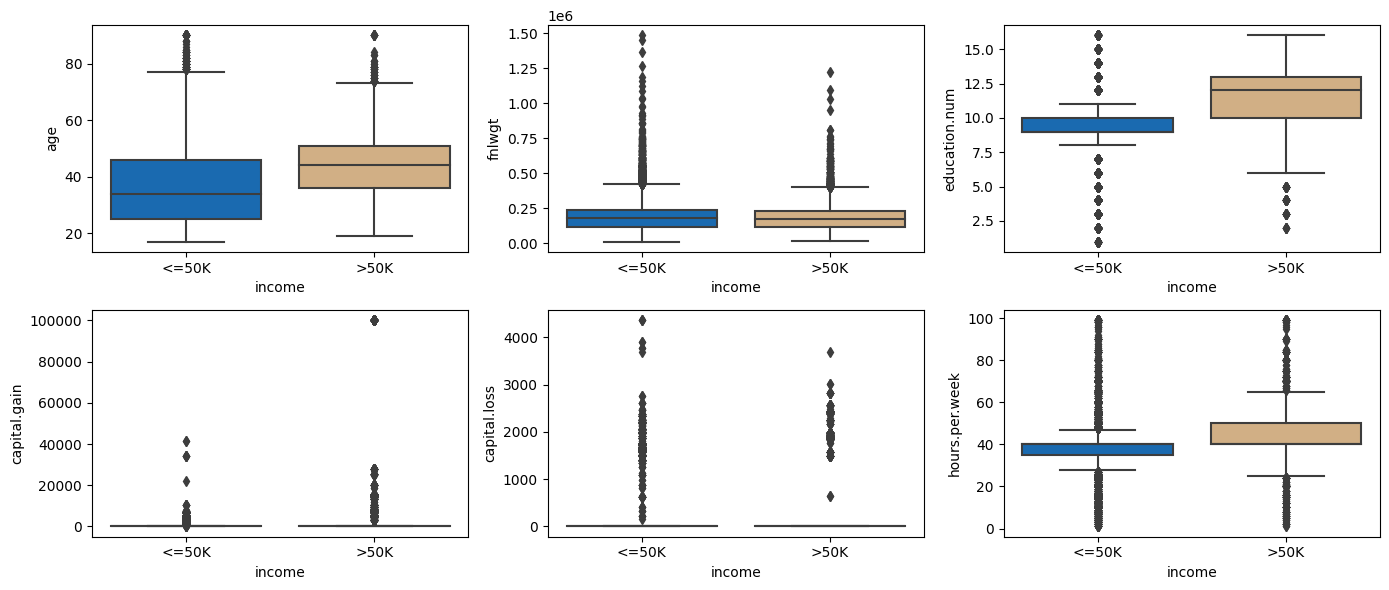

In [40]:
p=df.select_dtypes(include='number').columns.to_list()
p.append("income")
y=3
x=math.ceil((len(p)-1)/y)

plt.subplots(x,y,figsize=(14,6))

for i in range(1,len(p)) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df,y=p[i-1],x='income',palette=['#016CC9','#DEB078'])
    #plt.xlabel(vars[i-1])
    #plt.title(vars[i-1])
plt.tight_layout()
plt.show()

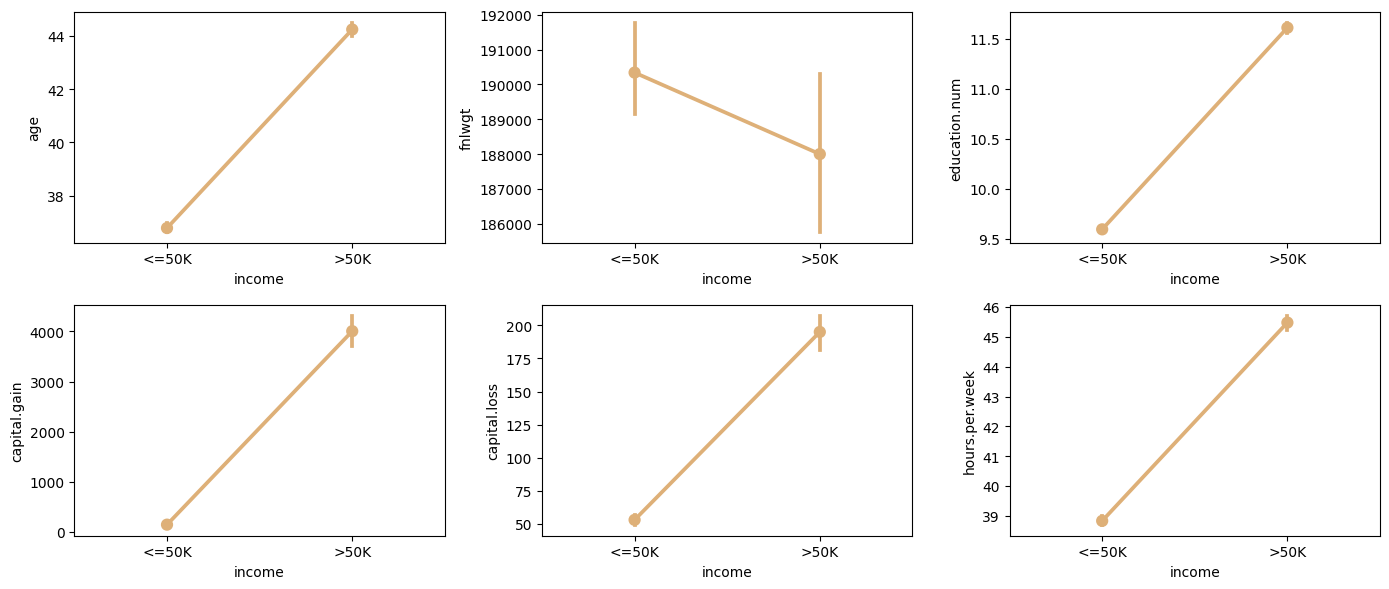

In [41]:
p=df.select_dtypes(include='number').columns.to_list()
p.append("income")
y=3
x=math.ceil((len(p)-1)/y)

plt.subplots(x,y,figsize=(14,6))

for i in range(1,len(p)) :
    plt.subplot(x,y,i)
    sns.pointplot(data=df,y=p[i-1],x='income',color='#DEB078')
    #plt.xlabel(vars[i-1])
    #plt.title(vars[i-1])
plt.tight_layout()
plt.show()

# Correlation between features

In [42]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [43]:
fig = px.imshow(df.corr().round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale=['#016CC9','#DEB078'])
fig.show()

<ipython-input-43-787ec6d1d9fe>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



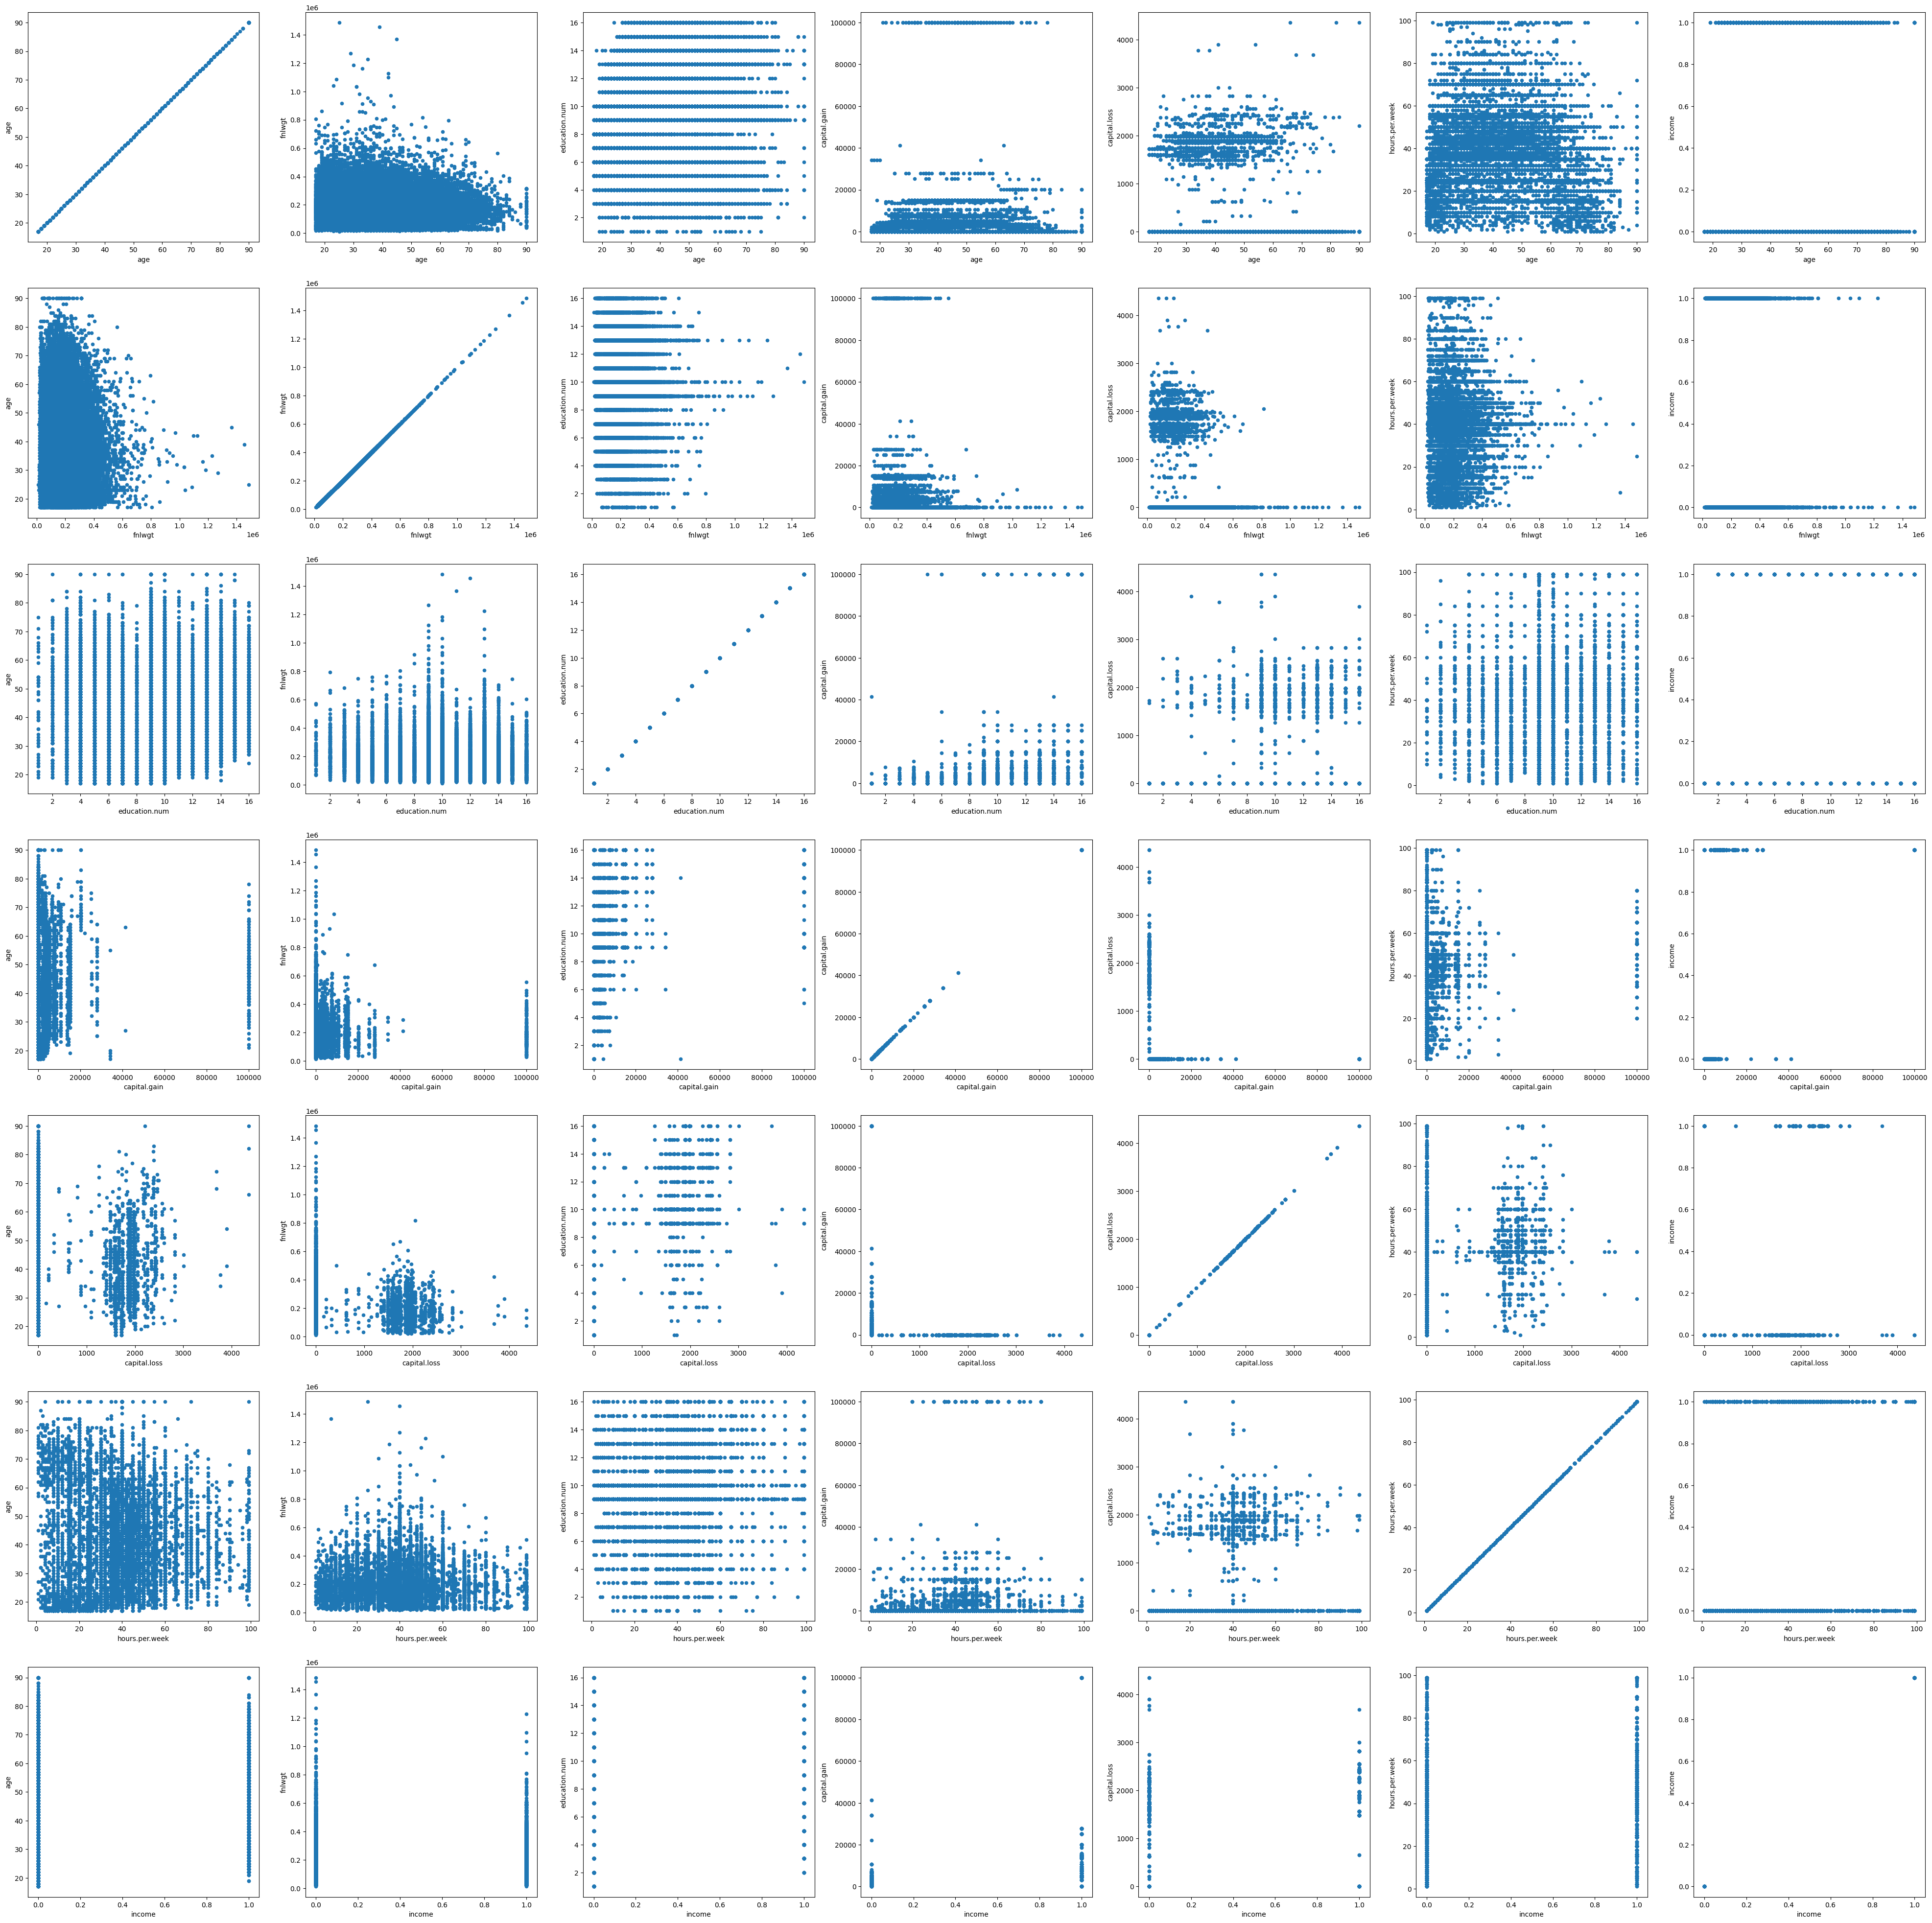

In [44]:
p=df.select_dtypes(include='number').columns.to_list()

fig, axes = plt.subplots(len(p),len(p), figsize=(50,50))

for i, col in enumerate(p):
    for j, col2 in enumerate(p):
        df.plot(x=col, y=col2, kind="scatter", ax=axes[i][j])
        # df.plot(x=col, y=col2, kind="scatter")

plt.show()

# Vsisualize entire data with PCA and T-SNE

In [45]:
feat_cols = df.select_dtypes(include='number').columns.to_list()
del (feat_cols[-1])
feat_cols

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [46]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [9.95113642e-01 4.87183949e-03 1.44878108e-05]


<ipython-input-47-d87002b36f28>:2: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



<Axes: xlabel='pca-one', ylabel='pca-two'>

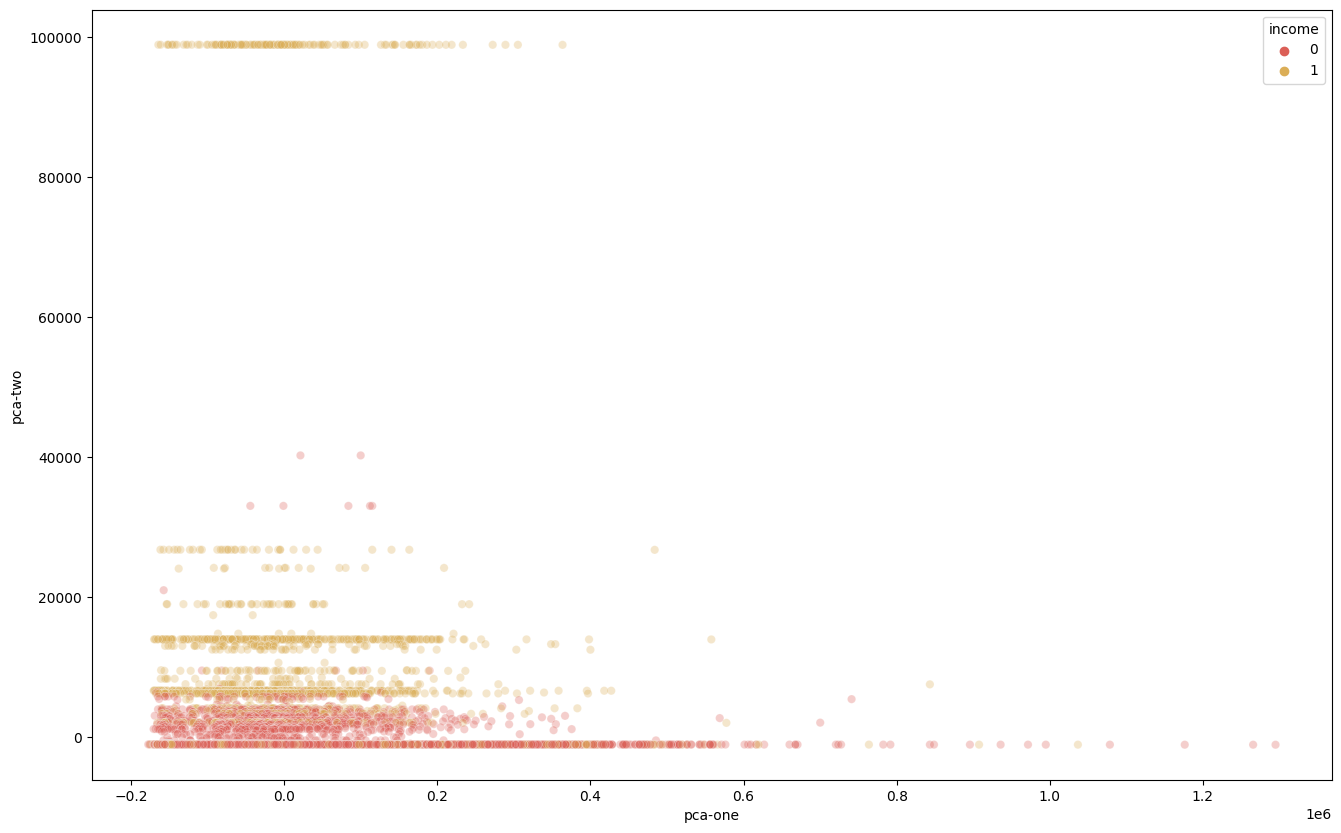

In [47]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="income",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

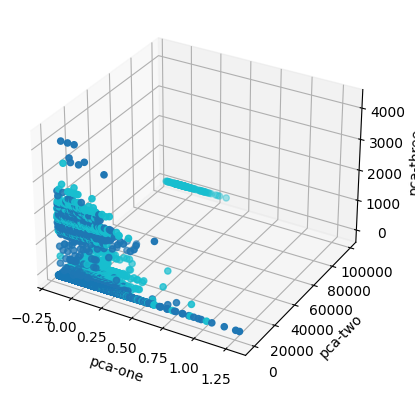

In [48]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.scatter(
    xs=df["pca-one"],
    ys=df["pca-two"],
    zs=df["pca-three"],
    c=df["income"],
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [49]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df[feat_cols].values)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 32561 samples in 0.034s...
[t-SNE] Computed neighbors for 32561 samples in 1.247s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32561
[t-SNE] Computed conditional probabilities for sample 2000 / 32561
[t-SNE] Computed conditional probabilities for sample 3000 / 32561
[t-SNE] Computed conditional probabilities for sample 4000 / 32561
[t-SNE] Computed conditional probabilities for sample 5000 / 32561
[t-SNE] Computed conditional probabilities for sample 6000 / 32561
[t-SNE] Computed conditional probabilities for sample 7000 / 32561
[t-SNE] Computed conditional probabilities for sample 8000 / 32561
[t-SNE] Computed conditional probabilities for sample 9000 / 32561
[t-SNE] Computed conditional probabilities for sample 10000 / 32561
[t-SNE] Computed conditional probabilities for sample 11000 / 32561
[t-SNE] Computed conditional probabilities for sample 12000 / 32561
[t-SNE] Computed conditional probabilities for sa

<ipython-input-50-e560dd4c68d7>:5: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

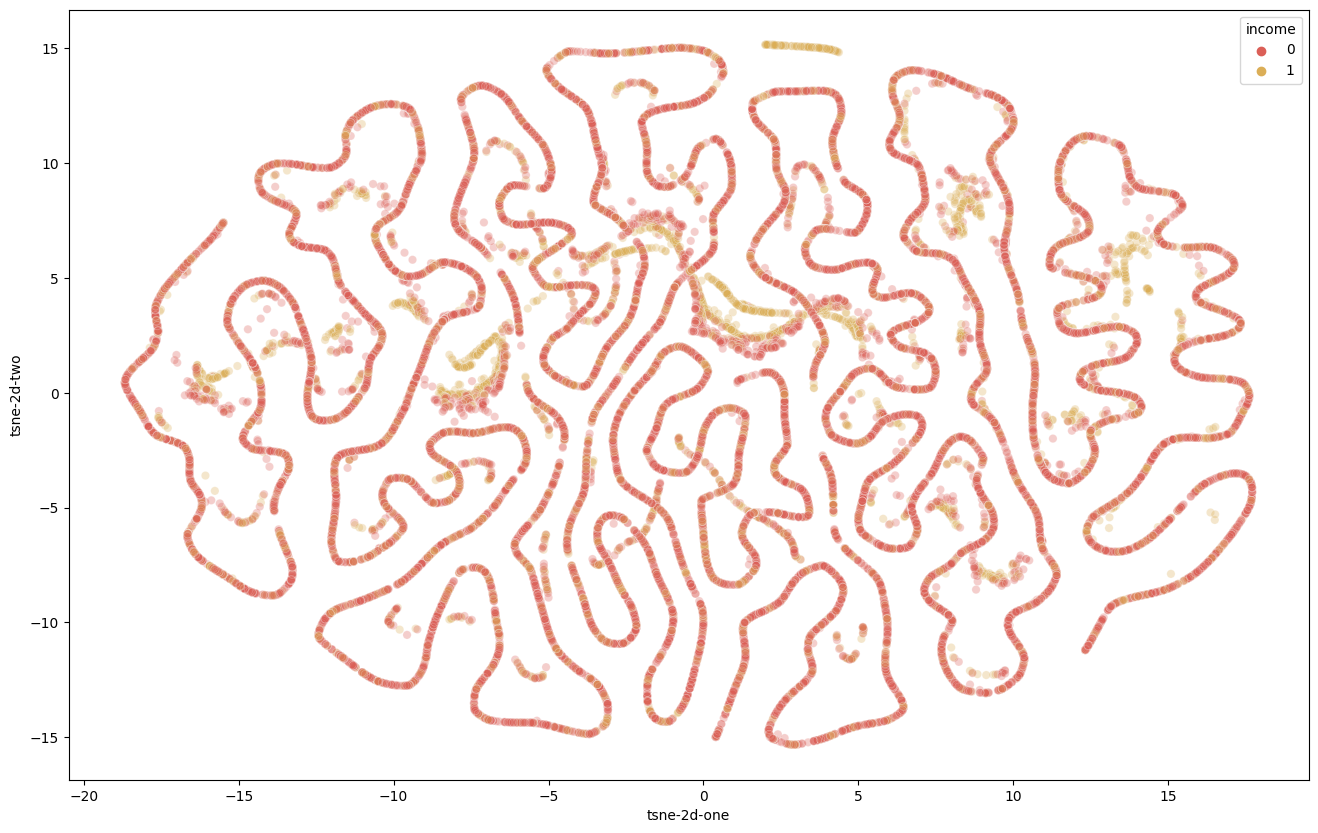

In [50]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="income",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

<ipython-input-51-7aa892f277af>:4: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.

<ipython-input-51-7aa892f277af>:15: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

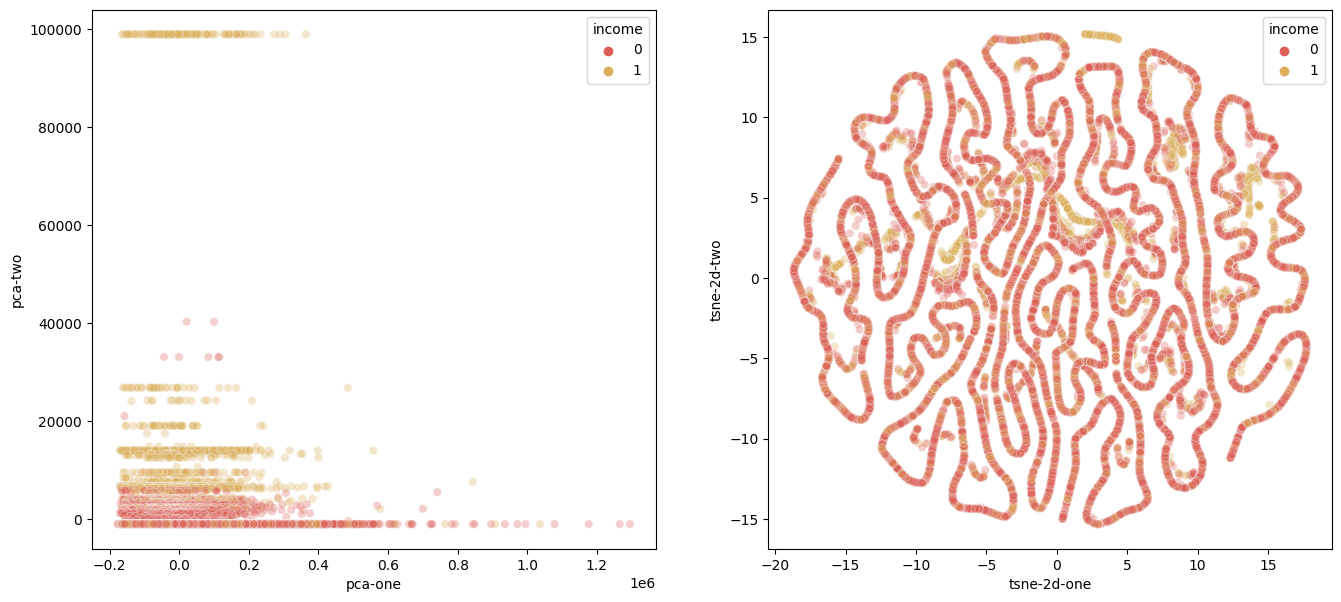

In [51]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="income",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="income",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax2
)